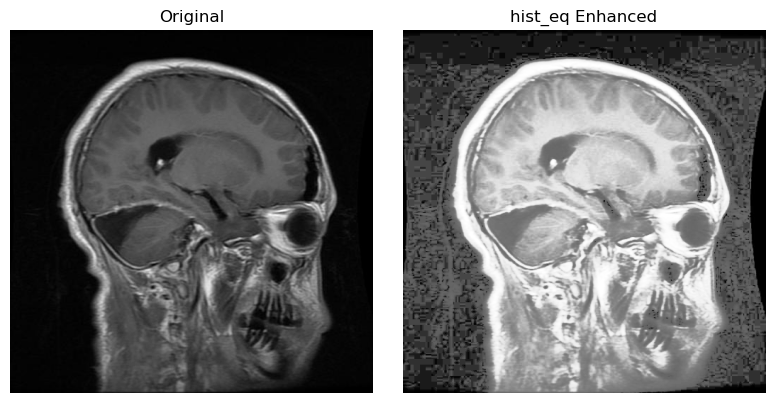

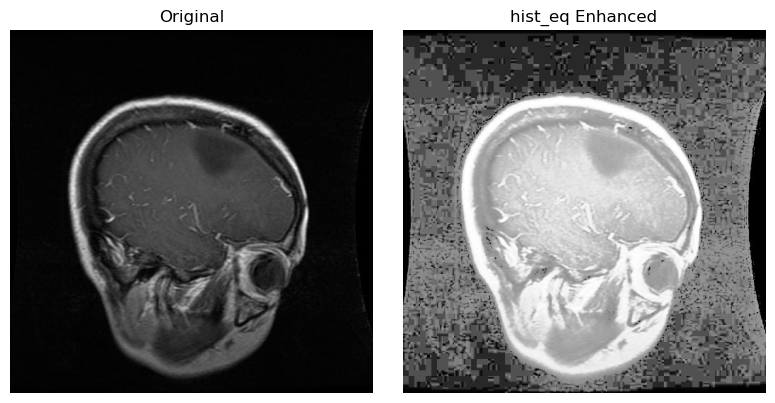

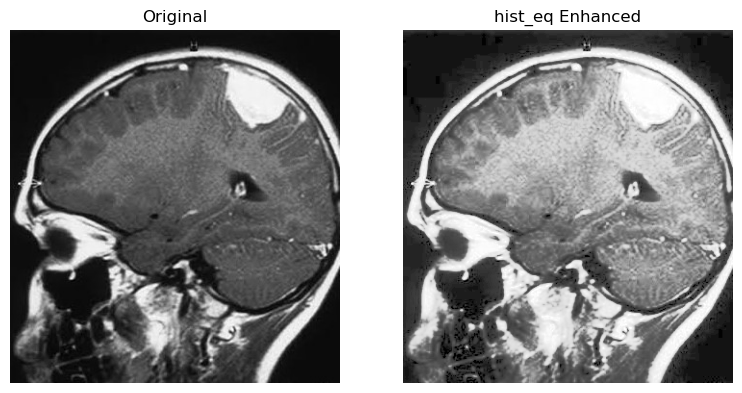

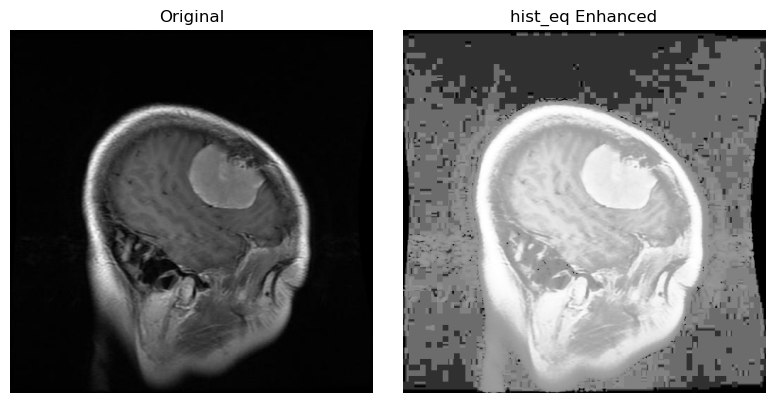

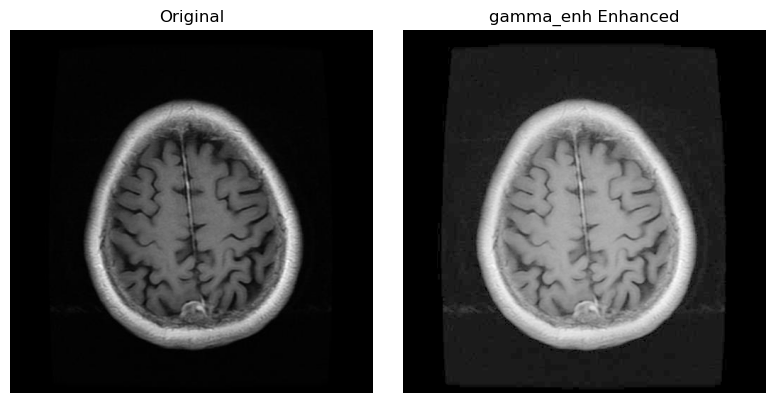

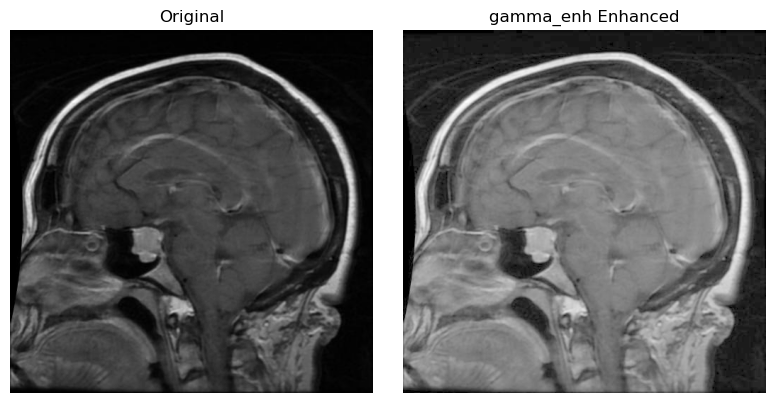

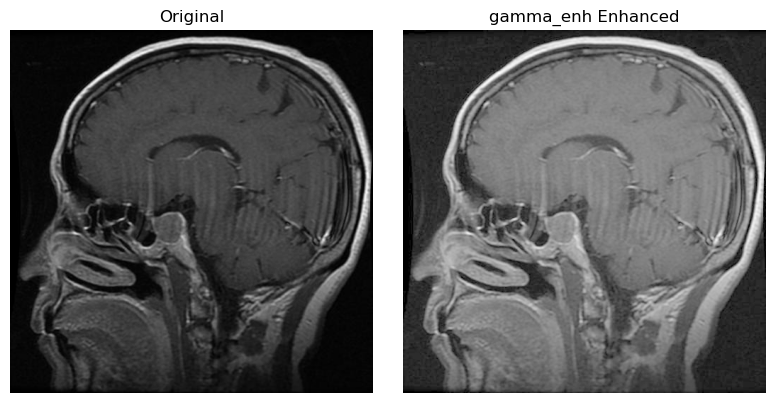

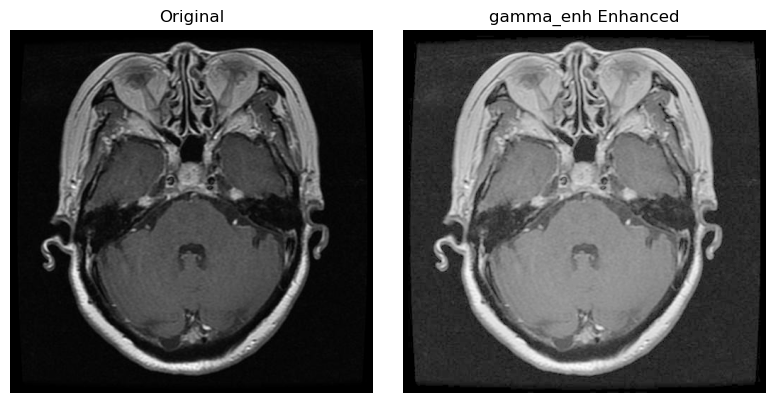

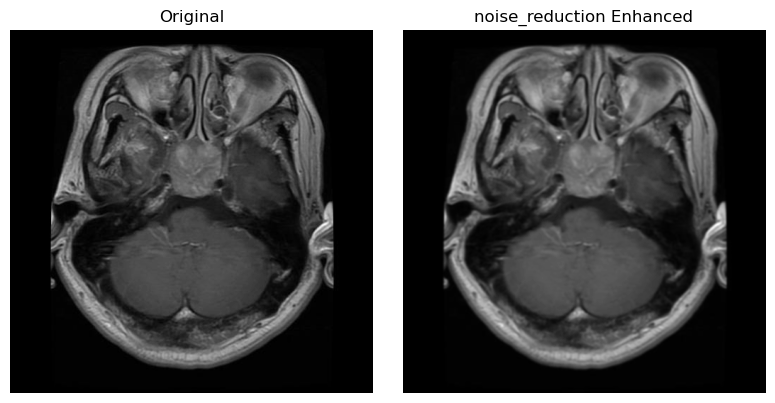

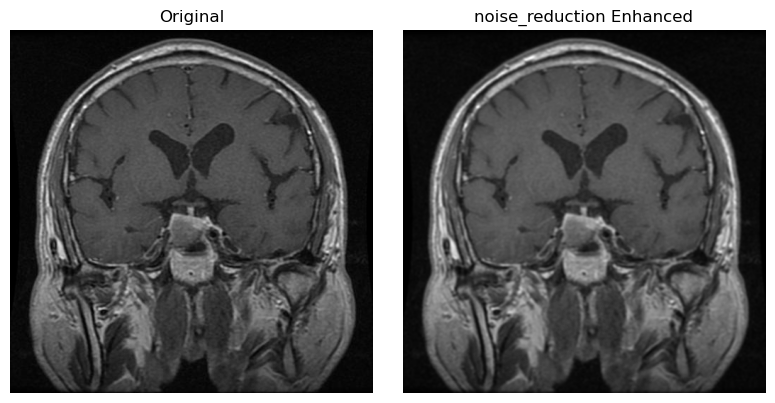

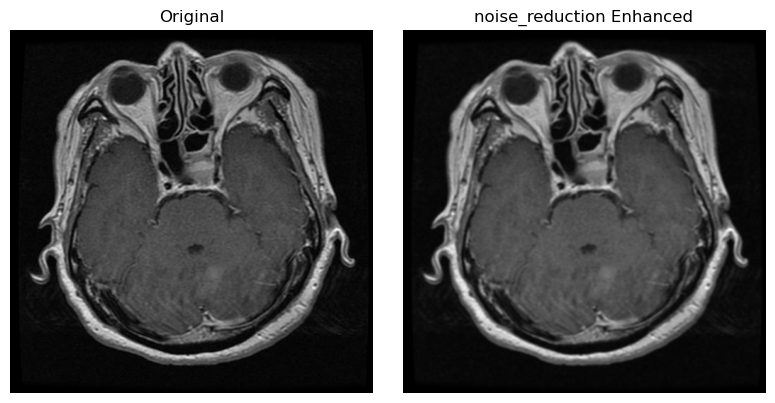

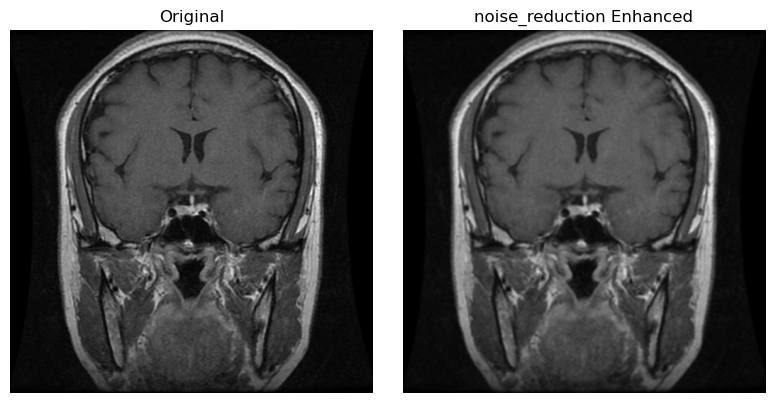

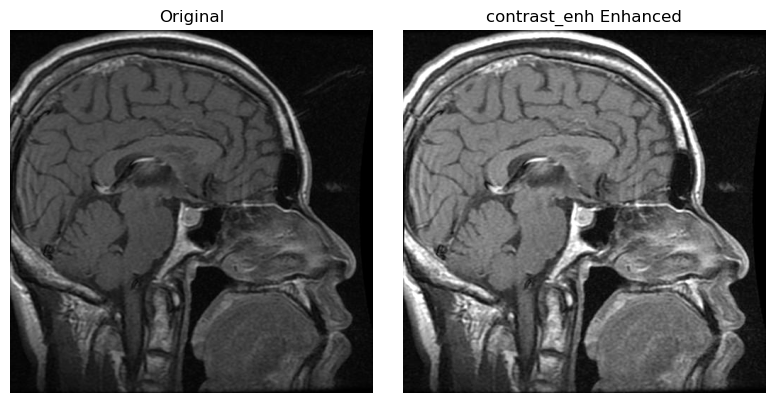

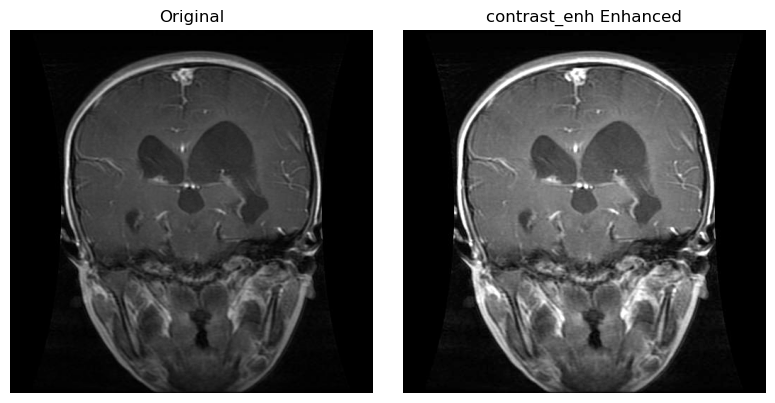

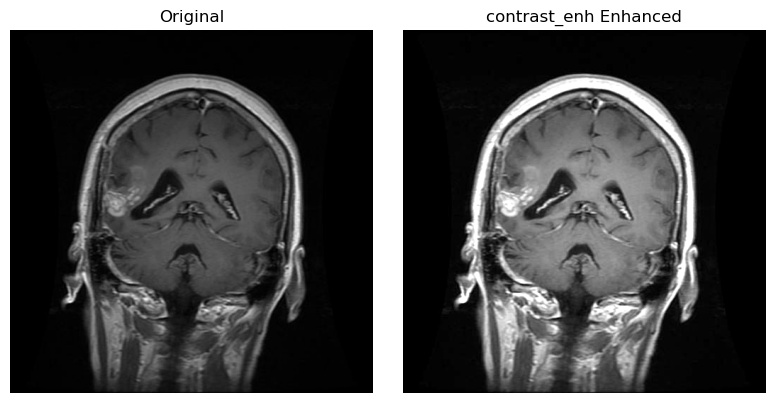

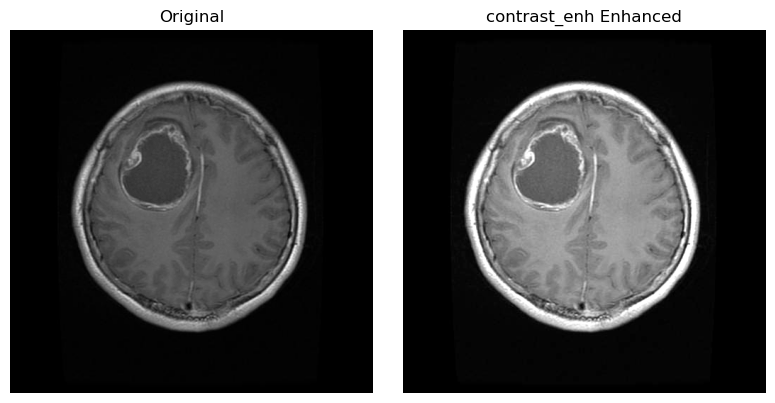

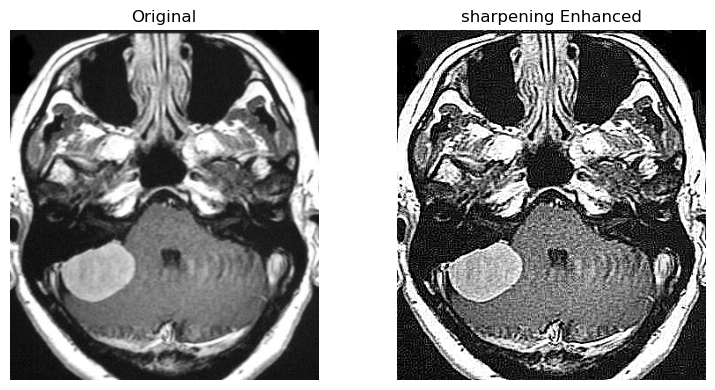

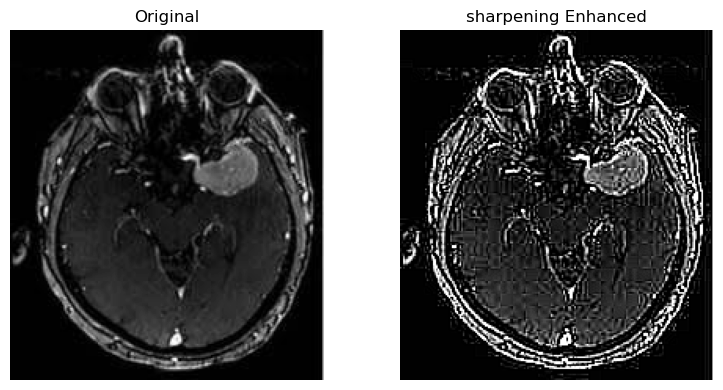

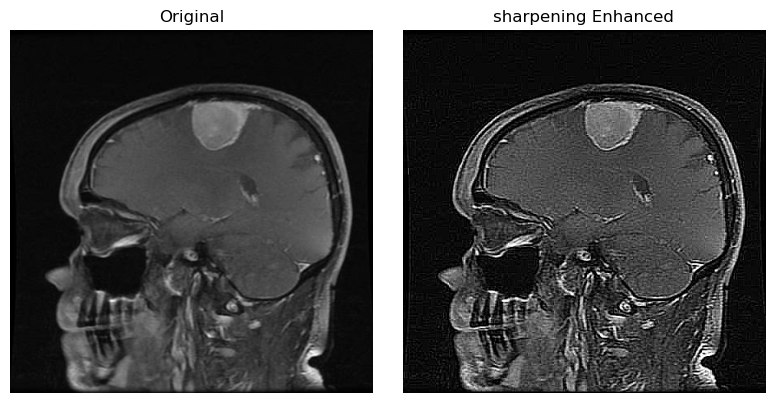

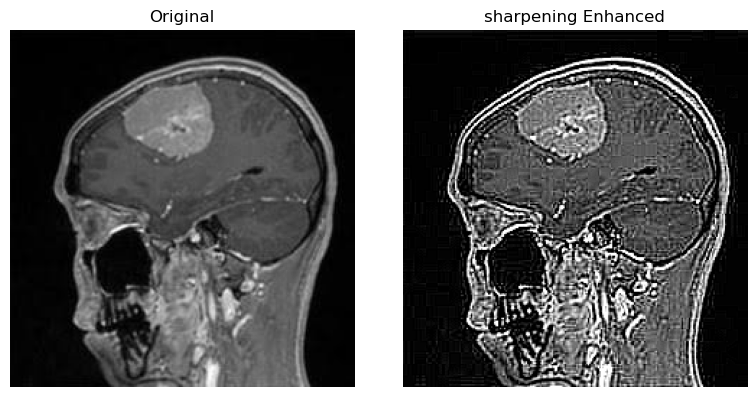

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def gamma_correction(image, gamma=0.5):
    gamma_corrected = np.power(image / 255.0, gamma) * 255.0
    gamma_corrected = gamma_corrected.astype(np.uint8)
    return gamma_corrected

def noise_reduction(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

def contrast_adjustment(image, alpha=1.5, beta=25):
    contrast_adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return contrast_adjusted

def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def enhance_and_save_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    enhancement_methods = [
        ("hist_eq", histogram_equalization),
        ("gamma_enh", gamma_correction),
        ("noise_reduction", noise_reduction),
        ("contrast_enh", contrast_adjustment),
        ("sharpening", sharpen_image)
    ]

    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png'))]

    for i in range(0, len(image_files), 4):
        # Read the original grayscale images
        original_images = [
            cv2.imread(os.path.join(input_folder, image_files[i + j]), cv2.IMREAD_GRAYSCALE)
            for j in range(4)
        ]

        # Apply the enhancement technique to each set of 4 images
        method_index = i // 4
        method_name, method = enhancement_methods[method_index]
        enhanced_images = [method(img) for img in original_images]

        # Save the enhanced images and plot them
        for j, (original, enhanced) in enumerate(zip(original_images, enhanced_images)):
            # Save enhanced images
            output_path = os.path.join(output_folder, f"{method_name}_{image_files[i + j]}")
            #cv2.imwrite(output_path, enhanced) # uncomment this line if you want to save the image.

            # Plot original and enhanced images
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.title("Original")
            plt.imshow(original, cmap='gray')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"{method_name} Enhanced")
            plt.imshow(enhanced, cmap='gray')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

# Example usage:
input_folder = r'C:/input_images'
output_folder = r'C:/output_images_try'

enhance_and_save_images(input_folder, output_folder)
